In [2]:
#  For sting e changes I made in python files

In [3]:
from config import config
from tqdm import tqdm
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants
import csv
from matplotlib.lines import Line2D
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
color_pone='#7570b3'
color_pone_2 = '#9ebcda'
color_ice='#e7298a'
color_ice_2='#fa9fb5'

color_combined='#33a02c'
color_thermal='#fdc086'
color_unitary='k'

In [4]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(2, 6, 9) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-26, -21, 9) # 10
mass_ext = np.logspace(2, 6, 131)
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = 4
sv_id = -1

mass_grid_2 =  [800, 900, 1000, 1200, 1500, 1700, 2000, 5000, 10000, 100000]

#mass_grid_1 = np.logspace(2, 6, 15)#
sv_grid_1 =  np.logspace(-26, -21, 10)

mass_grid_1=[     5,      6,      8,     10,     15,     20,     25,     30,
           40,     50,     60,     70,     80,     90,    100,    110,
          120,    130,    140,    150,    160,    180,    200,    220,
          240,    260,    280,    300,    330,    360,    400,    450,
          500,    550,    600,    650,    700,    750,    800,    900,
         1000,   1100,   1200,   1300,   1500,   1700,   2000,   2500,
         3000,   4000,   5000,   6000,   7000,   8000,   9000,  10000,
        12000,  15000,  20000,  30000,  50000, 100000]

sv_grid_3 = np.logspace(-28, -23, 9)

mass_grid_l = np.logspace(2, 6, 20)
sv_grid_l = np.logspace(-26, -21, 20)

std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1 # Linewidth
h_length=0.7  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

ICeCube... Effective Areas


In [5]:
len(mass_grid_2)

10

In [6]:
xx,yy = np.meshgrid(np.log10(mass_grid),np.log10(sv_grid))

xx_1,yy_1 = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid))
xx_2, yy_2 = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid))

xx_3,yy_3 = np.meshgrid(np.log10(mass_grid),np.log10(sv_grid_3))
xx_4, yy_4 = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid_3))

xx_6, yy_6 = np.meshgrid(np.log10(mass_grid_1),np.log10(sv_grid))


xx_l, yy_l = np.meshgrid(np.log10(mass_grid_l),np.log10(sv_grid_l))
xx_1_l, yy_1_l = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid_l))
xx_2_l, yy_2_l = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid_l))
xx_3_l, yy_3_l = np.meshgrid(np.log10(mass_grid_l),np.log10(sv_grid_3))
xx_4_l, yy_4_l = np.meshgrid(np.log10(mass_grid_2),np.log10(sv_grid_3))
xx_6_l, yy_6_l = np.meshgrid(np.log10(mass_grid_1),np.log10(sv_grid_l))


In [7]:
xx_1.shape

(9, 10)

In [8]:
surface_fluxes = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower = surface_fluxes[20][3] # background fluxes at 20° ----

In [9]:
dm = DM2Nu()

In [10]:
limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/19_08_22/data/limits_results.pkl','rb'))
limits_ice_old = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_04_desk/data/limits_results_IceCube.pkl','rb'))
limits_ice_DM = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/28_04_DM/limits_results.pkl", "rb"))
limits_ice_tt = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/19_09_22/data/limits_results.pkl','rb'))

# Galactic only
limits_ice_g_nu = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12_22_gal/data/limits_results_gal_All.pkl','rb')) # 08
limits_ice_g_w = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12_22_gal/data/limits_results_gal_W.pkl','rb'))
limits_ice_g_t = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12_22_gal/data/limits_results_gal_\[Tau].pkl','rb'))
limits_ice_g_b = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12_22_gal/data/limits_results_gal_b.pkl','rb'))




limits_com_unsm = pickle.load(open('../data/06_04/unsmeared/limits_results_combined_un.pkl', 'rb'))
limits_com_sm = pickle.load(open('../data/06_04/smeared/limits_results_combined_sm.pkl', 'rb'))

limits_pone_unsm = pickle.load(open('../data/tmp_files/unsmeared/limits_results_POne_un_NFW_All.pkl', 'rb'))
limits_pone_sm = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW_All.pkl', 'rb'))

limits_pone_tt_un = pickle.load(open('../data/tmp_files/unsmeared/limits_results_POne_un_NFW_\[Tau].pkl', 'rb'))
limits_pone_tt_sm = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW_\[Tau].pkl', 'rb'))

limits_pone_bb_un = pickle.load(open('../data/tmp_files/unsmeared/limits_results_POne_un_NFW_b.pkl', 'rb'))
limits_pone_bb_sm = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW_b.pkl', 'rb'))

limits_pone_ww_un = pickle.load(open('../data/tmp_files/unsmeared/limits_results_POne_un_NFW_W.pkl', 'rb'))
limits_pone_ww_sm = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW_W.pkl', 'rb'))


limits_com_sm_old = pickle.load(open('../data/28_03_02/smeared/limits_results_combined_sm.pkl', 'rb'))

In [11]:
limits_pone_sm_stephan =  pickle.load(open('../data/tmp_files/smeared/limits_pone_direct.pkl', 'rb'))
m_sm_direct = limits_pone_sm_stephan["x_coords"]
sv_sm_direct = limits_pone_sm_stephan
sv_sm_dir_90_up   = limits_pone_sm_stephan["y_uncertainty_up_90"] 
sv_sm_dir_90_down = limits_pone_sm_stephan["y_uncertainty_down_90"]
sv_sm_dir_68_up   = limits_pone_sm_stephan["y_uncertainty_up_68"]
sv_sm_dir_68_up   = limits_pone_sm_stephan["y_uncertainty_down_68"]



with open('../data/Stephan_corrections/delta_limits_pone.pkl', 'rb') as f:
    pone_delta = pickle.load(f)
with open('../data/Stephan_corrections/tau_limits_pone.pkl', 'rb') as f:
    pone_tau = pickle.load(f)
with open('../data/Stephan_corrections/w_limits_pone.pkl', 'rb') as f:
    pone_w = pickle.load(f)
with open('../data/Stephan_corrections/delta_limits_icecube.pkl', 'rb') as f:
    icecube_delta = pickle.load(f)
with open('../data/Stephan_corrections/tau_limits_icecube.pkl', 'rb') as f:
    icecube_tau = pickle.load(f)
with open('../data/Stephan_corrections/w_limits_icecube.pkl', 'rb') as f:
    icecube_w = pickle.load(f)

In [12]:
limits_pone_sm_stephan

{'x_coords': array([6.        , 5.78947368, 5.78854599, 5.57894737, 5.52205146,
        5.36842105, 5.15789474, 5.15393782, 4.94736842, 4.73684211,
        4.67376157, 4.52631579, 4.31578947, 4.17697088, 4.10526316,
        4.06635704, 3.93877115, 3.90065352, 3.89473684, 3.78539845,
        3.68421053, 3.47368421, 3.45499702, 3.26315789, 3.09863184,
        3.05263158, 3.01246873, 2.84210526, 2.69430479, 2.63157895,
        2.42105263, 2.21052632, 2.13833549, 2.0396748 , 2.01146463,
        2.01150402]),
 'y_coords': array([-23.68832114, -23.90610205, -23.90698168, -24.1292435 ,
        -24.17013957, -24.314569  , -24.43142189, -24.43329747,
        -24.59361518, -24.67720107, -24.69645536, -24.7882553 ,
        -24.88007499, -24.95961326, -25.02559913, -24.95961326,
        -24.69645536, -24.43329747, -24.37560322, -24.43329747,
        -24.52377636, -24.68768138, -24.69645536, -24.85718778,
        -24.69645536, -24.6678026 , -24.69645536, -24.8737309 ,
        -24.95961326, -25.0179

In [13]:
# Limits data Loading 
cl_lit_km3net = np.loadtxt('../data/km3net_nfw.csv', delimiter=",")
cl_lit_km3net = (cl_lit_km3net[cl_lit_km3net[:, 0].argsort()])
#cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
#cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

cl_lit_HE = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_HE = (cl_lit_HE[cl_lit_HE[:, 0].argsort()])
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

cl_lit_ic_86 = np.loadtxt('../data/IC_86_halo_tau.csv', delimiter=",")
cl_lit_ic_86 = (cl_lit_ic_86[cl_lit_ic_86[:, 0].argsort()])

cl_lit_ic_79 = np.loadtxt('../data/IC79_GC_tau.csv', delimiter=",")
cl_lit_ic_79 = (cl_lit_ic_79[cl_lit_ic_79[:, 0].argsort()])

cl_lit_anta = np.loadtxt('../data/Antares_2007_2012.csv', delimiter=",")
cl_lit_anta = (cl_lit_anta[cl_lit_anta[:, 0].argsort()])

cl_lit_fermi = np.loadtxt('../data/Fermi_Magic_95.csv', delimiter=",")
cl_lit_fermi = (cl_lit_fermi[cl_lit_fermi[:, 0].argsort()])

#cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
#cl_lit = (cl_lit[cl_lit[:, 0].argsort()])


cl_lit_bb = np.loadtxt('../data/artsen_limits_bb.csv', delimiter=',')
cl_lit_bb = (cl_lit_bb[cl_lit_bb[:, 0].argsort()])

th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
th_cl = (th_cl[th_cl[:, 0].argsort()])
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
unitarity = (unitarity[unitarity[:, 0].argsort()])

m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

#l_c_un = np.loadtxt('../data/limits_combined_un.csv',  delimiter=',')
#l_c_un = (l_c_un[l_c_un[:, 0].argsort()])

#l_c_sm = np.loadtxt('../data/limits_combined_sm.csv',  delimiter=',')
#l_c_sm = (l_c_sm[l_c_sm[:, 0].argsort()])


In [14]:
sv_sm_direct

{'x_coords': array([6.        , 5.78947368, 5.78854599, 5.57894737, 5.52205146,
        5.36842105, 5.15789474, 5.15393782, 4.94736842, 4.73684211,
        4.67376157, 4.52631579, 4.31578947, 4.17697088, 4.10526316,
        4.06635704, 3.93877115, 3.90065352, 3.89473684, 3.78539845,
        3.68421053, 3.47368421, 3.45499702, 3.26315789, 3.09863184,
        3.05263158, 3.01246873, 2.84210526, 2.69430479, 2.63157895,
        2.42105263, 2.21052632, 2.13833549, 2.0396748 , 2.01146463,
        2.01150402]),
 'y_coords': array([-23.68832114, -23.90610205, -23.90698168, -24.1292435 ,
        -24.17013957, -24.314569  , -24.43142189, -24.43329747,
        -24.59361518, -24.67720107, -24.69645536, -24.7882553 ,
        -24.88007499, -24.95961326, -25.02559913, -24.95961326,
        -24.69645536, -24.43329747, -24.37560322, -24.43329747,
        -24.52377636, -24.68768138, -24.69645536, -24.85718778,
        -24.69645536, -24.6678026 , -24.69645536, -24.8737309 ,
        -24.95961326, -25.0179

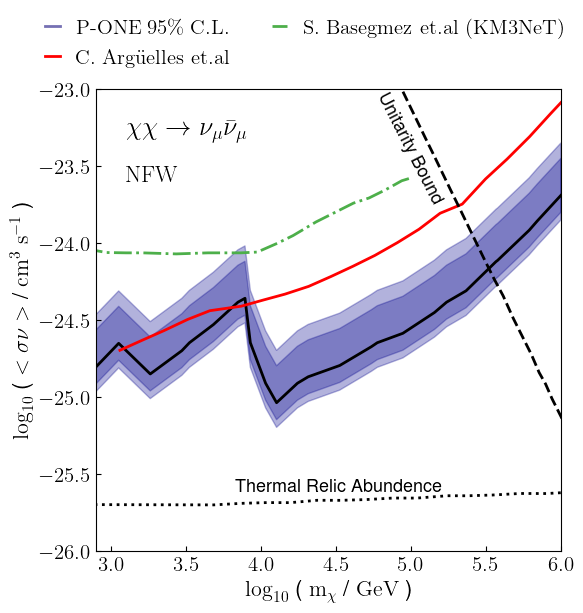

In [64]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)


# Stephan Corrections ---------
ax1.plot(pone_delta['x_coords'], pone_delta['y_coords'] - 0.1,color='k', lw=2)  # Mistake in the storing. Need to subtract 0.1 for PONE
ax1.fill_between(pone_delta['x_coords'], pone_delta['y_2sigma_down'], pone_delta['y_2sigma_up'], color='darkblue', alpha=0.3)
ax1.fill_between(pone_delta['x_coords'], pone_delta['y_1sigma_down'], pone_delta['Y_1sigma_up'], color='darkblue', alpha=0.3)

#C_pone_unsm = ax1.contour(xx,yy, limits_pone_unsm['numu'], linestyles='--', linewidth=15, colors=color_pone, labels= r'P-ONE unsmeared', levels=[0.95])

#C_pone_sm =  ax1.contourf(xx_l,yy_l, limits_pone_sm['numu'], linestyles='-.', linewidth=15,colors=[color_pone, color_pone_2], alpha=0.95,  levels=[0.7,0.8,0.95, 0.96], antialised=False) 
#ax1.contour(xx_l,yy_l, limits_pone_sm['numu'], linestyles='-.', linewidth=15,colors='k',  levels=[0.9]) 

ax1.step([0],[0], color=color_pone, label=r'$\textrm{P-ONE}$ $95\%$ $\textrm{C.L.}$', lw=2 )

ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color='r',label=r'$\textrm{C. Argüelles et.al}$', lw=2)
ax1.plot(np.log10(cl_lit_km3net[:, 0]), np.log10(cl_lit_km3net[:, 1]), '-.',color='#4daf4a', label=r'$\textrm{S. Basegmez et.al (KM3NeT)}$', lw=2)
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), ':',color='k', lw=2)
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '--', color='k', lw=2)

ax1.annotate('Thermal Relic Abundence', xy=(0.3,0.13), xycoords='axes fraction',fontsize=fontsize-2)
ax1.annotate('Unitarity Bound', xy=(0.60,0.75), xycoords='axes fraction', rotation=-63., fontsize=fontsize-2)

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.1),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)


ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $\textrm{m}_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
#ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
ax1.text(3.1, -23.3, r'$\chi\chi \rightarrow \nu_{\mu}\bar{\nu}_{\mu}$', fontsize=fontsize+4)
ax1.text(3.1, -23.6, r'$\textrm{NFW}$', fontsize=fontsize+2)
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.9, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -23)

figure.savefig('../pics/Limits_result_pone.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')
plt.show()

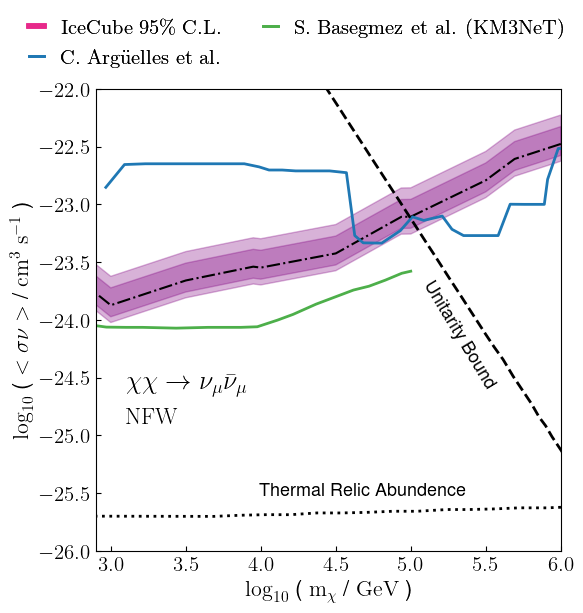

In [95]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3

#C_pone_unsm = ax1.contour(xx_l,yy_l,np.array(limits_pone_unsm['numu']), linestyles='--', linewidth=15,colors=color_pone, labels=r'P-ONE smeared', levels=[0.95])
#C_ice_DM = ax1.contourf(xx,yy, np.array(limits_ice_g_nu['numu']),linestyles='--', linewidth=3, colors=[color_ice, color_ice_2], alpha=0.65,  levels=[0.7,0.8,0.95, 0.96],labels=r'IceCube simulation')
#ax1.contour(xx,yy, limits_ice_g_nu['numu'], linestyles='--', linewidth=15,colors='k',  levels=[0.9]) 
ax1.step([0],[0], color=color_ice, label=r'$\textrm{IceCube}$ $95\%$ $\textrm{C.L.}$', lw=4)

# Stephan's corrections -------------
ax1.plot(icecube_delta['x_coords'], icecube_delta['y_coords'], '-.',color='k')
ax1.fill_between(icecube_delta['x_coords'], icecube_delta['y_2sigma_down'], icecube_delta['y_2sigma_up'], color='purple', alpha=0.3)
ax1.fill_between(icecube_delta['x_coords'], icecube_delta['y_1sigma_down'], icecube_delta['Y_1sigma_up'], color='purple', alpha=0.3)

#C_pone_sm =  ax1.contourf(xx_l,yy_l, limits_pone_sm['numu'], linestyles='-.', linewidth=15,colors=[color_pone, color_pone_2], alpha=0.95,  levels=[0.7,0.8,0.95, 0.96], antialised=False) 
#ax1.contour(xx_l,yy_l, limits_pone_sm['numu'], linestyles='-.', linewidth=15,colors='k',  levels=[0.9]) 

ax1.plot(np.log10(cl_lit_HE[:, 0]), np.log10(cl_lit_HE[:, 1]), color='#1f78b4', label=r'$\textrm{C. Argüelles et al.}$', lw=2)

ax1.plot(np.log10(cl_lit_km3net[:, 0]), np.log10(cl_lit_km3net[:, 1]), color='#4daf4a', label=r'$\textrm{S. Basegmez et al. (KM3NeT)}$', lw=2)

#ax1.plot(np.log10(cl_lit_fermi[:, 0]), np.log10(cl_lit_fermi[:, 1]), 'y' , label=r' \textrm{Fermi Magic combined} ($\gamma-\textrm{ray}$)')

#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'P-ONE')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), ':',color='k', lw=2)
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '--', color='k', lw=2)

ax1.annotate('Thermal Relic Abundence', xy=(0.35,0.12), xycoords='axes fraction',fontsize=fontsize-2)
ax1.annotate('Unitarity Bound', xy=(0.70,0.35), xycoords='axes fraction', rotation=-59., fontsize=fontsize-2)

#h_ice, l_ice= C_ice_DM.legend_elements()

#C_s = [C_ice_DM]#, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
#h_list = [h_ice[0]]#, h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]
#labels = [l_ice]#, l_com_unsm, l_com_sm, l_pone_unsm, l_com_sm]

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.1),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)

#
#legend_elements = [Line2D([0], [0], color='k', lw=1),
#                   Line2D([0], [0], linestyle='--', color='k',  lw=1.1)
#                  ]
#labels = [r'$\textrm{C. Argüelles et. al.}$',
#           r'$\textrm{Simulation}$']
#lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.8, 0.58),
#                 ncol=1, fontsize=fontsize, handlelength=h_length,
#                 fancybox=True, frameon=False)
#ax1.add_artist(lgd2)            
#lgd2 = ax1.legend(h_list, labels, loc=7, bbox_to_anchor=(0.8, +0.3),
#             fontsize=fontsize-2, handlelength=h_length, 
#             fancybox=True, frameon=True)
#ax1.add_artist(lgd2)#
#ax1.set_title(r'Confidence Level Limits ', y = 1.2, fontsize=fontsize+1)
ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $\textrm{m}_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
ax1.text(3.1, -24.6, r'$\chi\chi \rightarrow \nu_{\mu}\bar{\nu}_{\mu}$', fontsize=fontsize+4)
ax1.text(3.1, -24.9, r'$\textrm{NFW}$', fontsize=fontsize+2)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.9, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -22)  # min(np.log10(sv_grid)), -21
figure.savefig('../pics/Limits_result_ice.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')
plt.show()

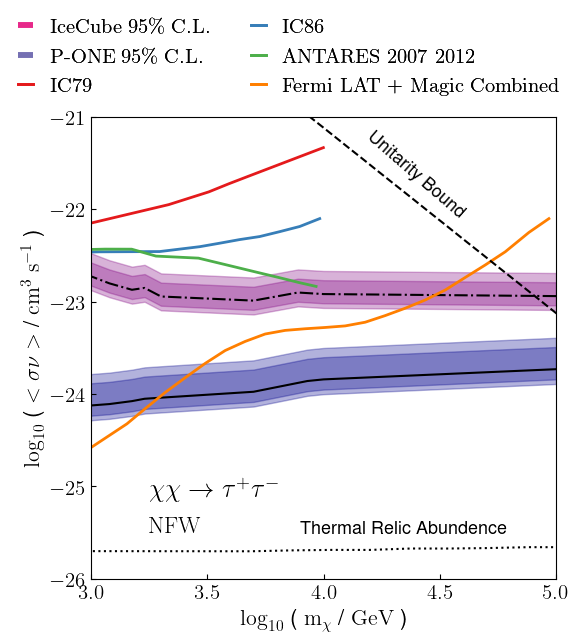

In [122]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
## #e41a1c
#377eb8
#4daf4a
#984ea3
#ff7f00
#ffff33

p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3


#C_tt = ax1.contour(xx_1_l,yy_1_l, limits_pone_tt_un['numu'],linestyles='--', linewidth=3, colors=color_pone, levels=[0.95], labels=r'P-ONE simulation')
#C_ice_DM = ax1.contourf(xx_2,yy_2, np.array(limits_ice_g_t['numu']),linestyles='--', linewidth=3, colors=[color_ice, color_ice_2], alpha=0.45,  levels=[0.7,0.8,0.95, 0.96],labels=r'IceCube simulation')
#ax1.contour(xx_2,yy_2, limits_ice_g_t['numu'], linestyles='-.', linewidth=15,colors='k',  levels=[0.9]) 
ax1.step([0],[0],'-.', color=color_ice, label=r'$\textrm{IceCube}$ $95\%$ $\textrm{C.L.}$', lw=4)
##C_tt_ice = ax1.contour(xx_2,yy_2, np.array(limits_ice_g_t['numu']),linestyles='--', linewidth=3, colors=color_ice, levels=[0.95], labels=r'IceCube simulation')
#
#C_pone_tt = ax1.contourf(xx_1_l,yy_1_l, np.array(limits_pone_tt_sm['numu']),linestyles='--', linewidth=3, colors=[color_pone, color_pone_2], alpha=0.65,  levels=[0.7,0.8,0.95, 0.96],labels=r'IceCube simulation')
#ax1.contour(xx_1_l,yy_1_l, limits_pone_tt_sm['numu'], linestyles='--', linewidth=15,colors='k',  levels=[0.9]) 
ax1.step([0],[0],'-.', color=color_pone, label=r'$\textrm{P-ONE}$ $95\%$ $\textrm{C.L.}$', lw=4)


# Stephan's corrections ------
ax1.plot(pone_tau['x_coords'], pone_tau['y_coords'] - 0.1, '-',color='k')  # Mistake in the storing. Need to subtract 0.1 for PONE
ax1.fill_between(pone_tau['x_coords'], pone_tau['y_2sigma_down'], pone_tau['y_2sigma_up'], color='darkblue', alpha=0.3)
ax1.fill_between(pone_tau['x_coords'], pone_tau['y_1sigma_down'], pone_tau['Y_1sigma_up'], color='darkblue', alpha=0.3)
ax1.plot(icecube_tau['x_coords'], icecube_tau['y_coords'], '-.',color='k')
ax1.fill_between(icecube_tau['x_coords'], icecube_tau['y_2sigma_down'], icecube_tau['y_2sigma_up'], color='purple', alpha=0.3)
ax1.fill_between(icecube_tau['x_coords'], icecube_tau['y_1sigma_down'], icecube_tau['Y_1sigma_up'], color='purple', alpha=0.3)


#c_tt_p_sm = ax1.contour(xx_1_l,yy_1_l, limits_pone_tt_sm['numu'],linestyles=':', linewidth=3, colors=color_pone, levels=[0.95], labels=r'P-ONE simulation')

ax1.plot(np.log10(cl_lit_ic_79[:, 0]), np.log10(cl_lit_ic_79[:, 1]), '#e41a1c', linestyle='-', label=r' \textrm{IC79}',lw=2)
ax1.plot(np.log10(cl_lit_ic_86[:, 0]), np.log10(cl_lit_ic_86[:, 1]), '#377eb8' , linestyle='-', label=r' \textrm{IC86}', lw=2)
ax1.plot(np.log10(cl_lit_anta[:, 0]), np.log10(cl_lit_anta[:, 1]), '#4daf4a' , label=r' \textrm{ANTARES 2007 2012}',lw=2)
ax1.plot(np.log10(cl_lit_fermi[:, 0]), np.log10(cl_lit_fermi[:, 1]), '#ff7f00' , label=r' \textrm{Fermi LAT + Magic Combined}',lw=2)

#ax1.plot(np.log10(cl_lit_bb[:, 0]), np.log10(cl_lit_bb[:, 1]), color_ice)
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'P-ONE')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), ':',  color='k')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '--',color='k' )

ax1.annotate('Thermal Relic Abundence', xy=(0.45,0.10), xycoords='axes fraction',fontsize=fontsize-2)
ax1.annotate('Unitarity Bound', xy=(0.59,0.78), xycoords='axes fraction', rotation=-41., fontsize=fontsize-2)

#h_ice, l_ice= C_ice_DM.legend_elements()

#C_s = [C_ice_DM]#, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
#h_list = [h_ice[0]]#, h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]
#labels = [l_ice]#, l_com_unsm, l_com_sm, l_pone_unsm, l_com_sm]

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.05, +1.13),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)

#h_tt, l_tt = C_tt.legend_elements()
#
#h_tt_ice, l_tt_ice = C_tt_ice.legend_elements()
#
#C_s = [C_tt, C_tt_ice]#, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
#h_list = [h_tt[0], h_tt_ice[0]]#, h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]

ax1.add_artist(lgd1)
#ax1.set_title(r'Confidence Level Limits ', y = 1.25, fontsize=fontsize+1)
#ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $\textrm{m}_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
ax1.text(3.25, -25.1, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}$', fontsize=fontsize+4)
ax1.text(3.25, -25.5, r'$\textrm{NFW}$', fontsize=fontsize+2)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(3, 5)
ax1.set_ylim(min(np.log10(sv_grid)), -21)  # min(np.log10(sv_grid)), -21

figure.savefig('../pics/Limits_result_tt.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')

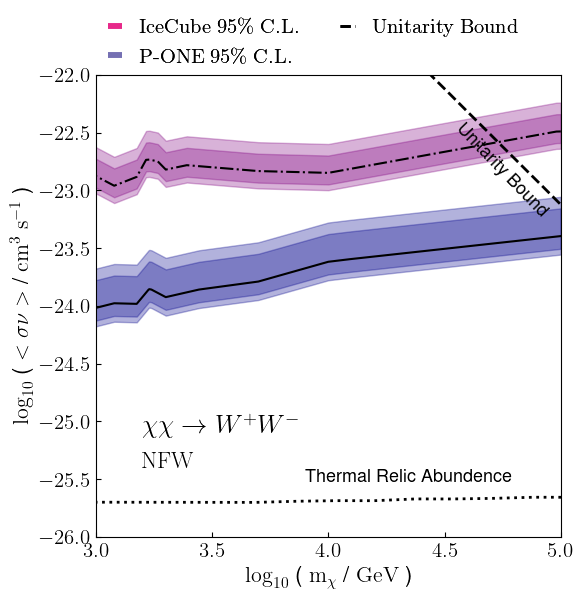

In [147]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3


#C_ice_DM = ax1.contourf(xx_2,yy_2, np.array(limits_ice_g_w['numu']),linestyles='--', linewidth=3, colors=[color_ice, color_ice_2], alpha=0.45,  levels=[0.7,0.8,0.95, 0.96],labels=r'IceCube simulation')
#ax1.contour(xx_2,yy_2, limits_ice_g_t['numu'], linestyles='-.', linewidth=15,colors='k',  levels=[0.9]) 
#ax1.step([0],[0],'-.', color=color_ice, label=r'$\textrm{IceCube Simulation}$', lw=4)
#
#C_pone_tt = ax1.contourf(xx_1_l,yy_1_l, np.array(limits_pone_ww_sm['numu']),linestyles='--', linewidth=3, colors=[color_pone, color_pone_2], alpha=0.65,  levels=[0.7,0.8,0.95, 0.96],labels=r'IceCube simulation')
#ax1.contour(xx_1_l,yy_1_l, limits_pone_ww_sm['numu'], linestyles='--', linewidth=15,colors='k',  levels=[0.9]) 
#ax1.step([0],[0],'-.', color=color_pone, label=r'$\textrm{P-ONE Simulation}$', lw=4)



# Stephan's corrections -------
ax1.plot(pone_w['x_coords'], pone_w['y_coords'] - 0.1, color='k')  # Mistake in the storing. Need to subtract 0.1 for PONE
ax1.fill_between(pone_w['x_coords'], pone_w['y_2sigma_down'], pone_w['y_2sigma_up'], color='darkblue', alpha=0.3)
ax1.fill_between(pone_w['x_coords'], pone_w['y_1sigma_down'], pone_w['Y_1sigma_up'], color='darkblue', alpha=0.3)
ax1.plot(icecube_w['x_coords'], icecube_w['y_coords'], '-.',color='k')
ax1.fill_between(icecube_w['x_coords'], icecube_w['y_2sigma_down'], icecube_w['y_2sigma_up'], color='purple', alpha=0.3)
ax1.fill_between(icecube_w['x_coords'], icecube_w['y_1sigma_down'], icecube_w['Y_1sigma_up'], color='purple', alpha=0.3)

#ax1.plot(np.log10(cl_lit_ic_79[:, 0]), np.log10(cl_lit_ic_79[:, 1]), color_ice, linestyle=':', label=r' \textrm{IC79}')
#ax1.plot(np.log10(cl_lit_ic_86[:, 0]), np.log10(cl_lit_ic_86[:, 1]), color_ice , linestyle='-.', label=r' \textrm{IC86}', lw=0.9)
#ax1.plot(np.log10(cl_lit_anta[:, 0]), np.log10(cl_lit_anta[:, 1]), 'k' , label=r' \textrm{ANTARES 2007 2012}')
#ax1.plot(np.log10(cl_lit_fermi[:, 0]), np.log10(cl_lit_fermi[:, 1]), 'y' , label=r' \textrm{Fermi Magic Combined}')

#ax1.plot(np.log10(cl_lit_bb[:, 0]), np.log10(cl_lit_bb[:, 1]), color_ice)
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'P-ONE')
ax1.step([0],[0],'-.', color=color_ice, label=r'$\textrm{IceCube}$ $95\%$ $\textrm{C.L.}$', lw=4)
ax1.step([0],[0],'-.', color=color_pone, label=r'$\textrm{P-ONE}$ $95\%$ $\textrm{C.L.}$', lw=4)
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), ':', color='k', lw=2)
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '--',color='k', lw=2, label=r'$\textrm{Unitarity Bound}$')

ax1.annotate('Thermal Relic Abundence', xy=(0.45,0.12), xycoords='axes fraction',fontsize=fontsize-2)
ax1.annotate('Unitarity Bound', xy=(0.77,0.69), xycoords='axes fraction', rotation=-46., fontsize=fontsize-2)

#
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.07),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)

ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $\textrm{m}_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
ax1.text(3.2, -25.1, r'$\chi\chi \rightarrow W^{+}W^{-}$', fontsize=fontsize+4)
ax1.text(3.2, -25.4, r'$\textrm{NFW}$', fontsize=fontsize+2)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(3, 5)
ax1.set_ylim(min(np.log10(sv_grid)), -22)  # min(np.log10(sv_grid)), -21

figure.savefig('../pics/Limits_result_ww.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')